#### 3.5 표본 통계량 성질
- 샘플링은 보통 1번
- 시뮬레이션을 사용하면 샘플링을 몇 번이고 반복 가능

##### 3.5.1 시행
- 시행이란 1회의 조사를 수행한 것
- 시행의 반복이 가능한 경우 반복한 횟수를 시행횟수라고 함

##### 3.5.2 표본분포
- 표본분포란 표본의 통계량이 따르는 확률분포
- 1회의 조사로 어을 수 있는 표본은 1개뿐

##### 3.5.3 라이브러리 임포트
- 이미 다 해놨지롱

In [94]:
population = stats.norm(loc=4,scale=0.8) #평균이 4고 표준편차 0.8인 정규분포

##### 3.5.4 표본 평균을 여러 번 계산하기
- 시행 횟수를 10000회로 해서 표본 평균을 10000개 얻어보자

In [95]:
sample_mean_array = np.zeros(10000) #평균 값을 저장할 변수

In [96]:
#10000개의 표본 평균을 저장
np.random.seed(1)
for i in range (0,10000): #10000개의 표본을 얻기 위해 반복
    sample=population.rvs(size=10) #샘플사이즈 10
    sample_mean_array[i]=np.mean(sample) #평균값 계산

In [97]:
sample_mean_array #10000개의 표본평균

array([3.92228729, 3.86432929, 4.06953003, ..., 4.13616562, 4.57489661,
       4.09896685])

##### 3.5.5 표본평균의 평균값은 모평균에 가깝다

In [98]:
np.mean(sample_mean_array) #표본평균의 평균이 모평균(4)과 유사

4.004202422791747

In [102]:
np.std(sample_mean_array, ddof=1) #모표준편차(0.8)보다 작음

0.2513580850860402

##### 3.5.6 샘플사이즈가 크면 표본평균은 모평균에 가까워진다
- 대상:표본평균
- 변화시키는 것:샘플사이즈
- 알고싶은 것:샘플사이즈가 커질수록 표본평균은 모평균에 가까워지는가?

In [103]:
size_array=np.arange(start=10,stop=100100,step=100) #10~10010까지 100단위로 변화하는 샘플사이즈
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [104]:
sample_mean_array_size=np.zeros(len(size_array)) #표본평균을 저장할 변수

In [105]:
#샘플 사이즈를 변화시켜가며 시뮬레이션을 실행
np.random.seed(1)
for i in range(0, len(size_array)):
    sample=population.rvs(size=size_array[i])
    sample_mean_array_size[i]=np.mean(sample)

Text(0, 0.5, 'sample mean')

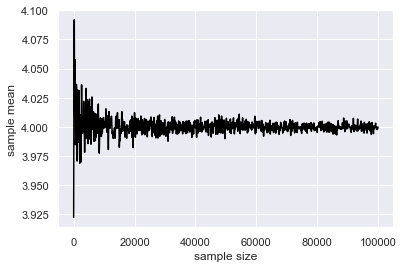

In [106]:
#가로축이 샘플사이즈, 세로축이 표본 평균인 그래프
plt.plot(size_array, sample_mean_array_size, color='black')
plt.xlabel("sample size")
plt.ylabel("sample mean")
#샘플사이즈가 커질수록 표본 평균이 모평균(4)에 가까워진다

##### 3.5.7 표본평균을 몇번이고 계산하는 함수 만들기

In [107]:
def calc_sample_mean(size,n_trial):
    sample_mean_Array=np.zeros(n_trial)
    for i in range(0, n_trial):
        sample=population.rvs(size=size)
        sample_mean_array[i]=np.mean(sample) #표본 평균을 저장
    return(sample_mean_array) # n_trial 횟수만큼 계산한 표본평균을 리턴

In [108]:
np.random.seed(1)
np.mean(calc_sample_mean(size=10 ,n_trial=10000))

4.004202422791747

##### 3.5.8 샘플사이즈를 바꿨을 때 표본평균의 분산

- 샘플사이즈 10, 20, 30으로 시뮬레이션 해보면서 샘플사이즈의 영향을 보자

In [114]:
np.random.seed(1)
# 샘플사이즈 10
size_10 = calc_sample_mean(size = 10, n_trial = 10000)
size_10_df = pd.DataFrame({
    "sample_mean" : size_10,
    "size":np.tile("size 10", 10000)
})
# 샘플사이즈 20
size_20 = calc_sample_mean(size = 20, n_trial = 10000)
size_20_df = pd.DataFrame({
    "sample_mean" : size_20,
    "size":np.tile("size 20", 10000)
})
# 샘플사이즈 30
size_30 = calc_sample_mean(size = 30, n_trial = 10000)
size_30_df = pd.DataFrame({
    "sample_mean" : size_30,
    "size":np.tile("size 30", 10000)
})
# 종합
sim_result = pd.concat([size_10_df, size_20_df, size_30_df])
# 결과 표시
print(sim_result.head())

   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


<AxesSubplot:xlabel='size', ylabel='sample_mean'>

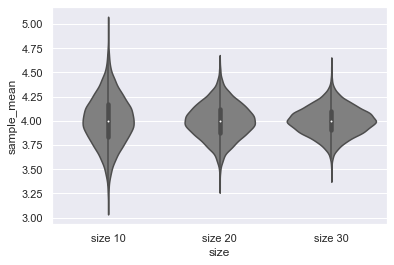

In [117]:
sns.violinplot(x = "size", y = "sample_mean", data = sim_result, color = 'gray')

##### 3.5. 표본평균의 표준편차는 모집단보다 작다
- 대상:표본평균의 표준편차
- 변화시키는 것:샘플사이즈
- 알고 싶은 것:샘플사이즈가 커질수록 표본평균의 표준편차는 작아진다 → 샘플사이즈가 커지면 표본평균은 보다 신뢰할 수 있는 값이 된다

In [139]:
# 2~100까지 2씩 차이 나게 하여 샘플 사이즈 준비
size_array = np.arange(start = 2, stop = 102, step = 2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [122]:
sample_mean_std_array = np.zeros(len(size_array)) # 표준편차를 저장할 변수

In [148]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size = size_array[i], n_trial = 100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof = 1)

Text(0, 0.5, 'mean_std value')

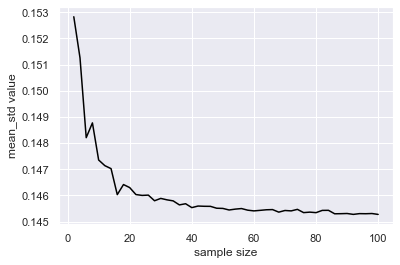

In [149]:
# 샘플사이즈에 따른 표본평균의 표준편차 간 관계를 그래프로
plt.plot(size_array, sample_mean_std_array, color ='black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

##### 3.5.10 표준오차
- 표준오차:Standard Error(SE)
- 표준오차=sigma/sqrt(N)

In [132]:
# 표준오차 구하기
standard_error = 0.8 / np.sqrt(size_array)
standard_error

array([0.56568542, 0.4       , 0.32659863, 0.28284271, 0.25298221,
       0.23094011, 0.21380899, 0.2       , 0.18856181, 0.17888544,
       0.17056057, 0.16329932, 0.15689291, 0.15118579, 0.14605935,
       0.14142136, 0.13719887, 0.13333333, 0.12977714, 0.12649111,
       0.12344268, 0.12060454, 0.11795356, 0.11547005, 0.11313708,
       0.11094004, 0.10886621, 0.1069045 , 0.10504515, 0.10327956,
       0.1016001 , 0.1       , 0.09847319, 0.09701425, 0.09561829,
       0.0942809 , 0.09299811, 0.09176629, 0.09058216, 0.08944272,
       0.08834522, 0.08728716, 0.08626622, 0.08528029, 0.0843274 ,
       0.08340577, 0.0825137 , 0.08164966, 0.0808122 , 0.08      ])

Text(0, 0.5, 'mean_std value')

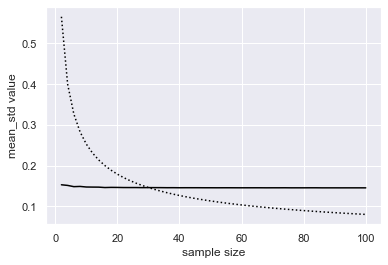

In [138]:
# 표준편차와 시뮬레이션 결과 그래프로 그리기
plt.plot(size_array, sample_mean_std_array, color='black')
plt.plot(size_array, standard_error, color = 'black', linestyle = 'dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

##### 3.5.11 표준오차의 직관적인 설명
- 표본평균의 표준편차는 원래 데이터의 표준편차보다도 작다
> 엘리베이터에 타는 사람의 경우를 생각해보면,   
체중이 극단적으로 많이 나가거나 적게 나가는 
경우는 별로x,  
작은 사람과 큰 사람이 섞여서 타는것이 자연스러움  
→체중이 합이 흩어진 정도가 작아짐  
즉, 표본평균들이 모평균에서 떨어져있는 정도가 작아짐

##### 3.5.12 표본분산의 평균값은 모분산과 차이가 있다

In [156]:
sample_var_array = np.zeros(10000) # 표본분산을 저장할 변수
# 시뮬레이션 실행
np.random.seed(1)
for i in range(0, 10000): # 시행 10000번
    sample = population.rvs(size = 10) #샘플사이즈 10
    sample_var_array[i] = np.var(sample, ddof = 0)
np.mean(sample_var_array) # 표본분산의 평균값

0.5746886877332101

- 모분산(0.64)보다 분산이 과소평과됨

##### 3.5.13 불편분산을 사용하면 편향이 사라진다
- ddof=1

In [161]:
# 불편 분산을 저장할 변수
unbias_var_array = np.zeros(10000)
# 샘플사이즈 10, 시행 10000번 시뮬레이션 실행
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    unbias_var_array[i] = np.var(sample, ddof = 1)
# 불편분산의 평균값
np.mean(unbias_var_array)

0.6385429863702334

##### 3.5.14 샘플사이즈가 크면 불편분산은 모분산에 가까워진다
- 대상:불편분산
- 변화시키는 것:샘플사이즈
- 알고 싶은 것:샘플사이즈가 커지면 불편분산은 모분산에 가까워진다

In [166]:
# 10~100010까지 100단위로 변화하는 샘플사이즈
size_array = np.arange(start = 10, stop = 100100, step = 100)
size_array
# 불편 분산 저장
unbias_var_array_size = np.zeros(len(size_array))

In [168]:
# 샘플사이즈 바꿔가면서 시뮬레이션 실행
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] = np.var(sample, ddof = 1)

Text(0, 0.5, 'unbias var')

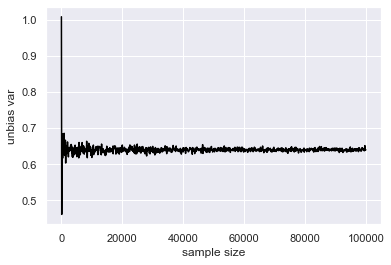

In [169]:
# 가로축 샘플사이즈, 세로축 불편분산인 꺾은선 그래프
plt.plot(size_array, unbias_var_array_size, color = 'black')
plt.xlabel("sample size")
plt.ylabel("unbias var")

##### 3.5.15 불편성
- 불편성:추정량의 기댓값이 진짜 모수가 되는 특성
- 편향이 없는 추정량  

##### 3.5.16 일치성
- 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워짐
- 샘플사이즈가 무한할 때 추정량과 모수가 일치한다  

##### 3.5.17 모수에 대해 좋은 추정량
- 정규분포의 모수:평균, 분산
- 정규분포의 모수는 보통 알려지지 않은 상태이므로 표본평균과 불편분산을 대신 사용
- 표본평균과 불편분산은 둘 다 불편성을 가지고 있다
 - 표본평균과 불편분산이 모수의 추정량으로 선호되는 특성을 가진다
 - 표본평균의 평균값은 모평균과 거의 같고, 불편분산의 평균값은 모분산과 거의 같다
- 표본평균과 불편분산은 둘 다 일치성을 가지고 있다
 - 샘플사이즈를 크게 하면 표본평균은 모평균에 가까워진다
 - 불편분산은 모분산에 가까워진다
 
##### 3.5.18 큰수의 법칙
- 큰수의 법칙:표본의 크기가 커지면 표본평균이 모평균에 가까워지는 법칙
- 큰수의 약한 법칙과 큰수의 강한 법칙이 있다

##### 3.5.19 중심극한정리
- 모집단분포가 무엇이든 간에 샘플사이즈가 커지면 확률변수의 합은 정규분포에 가까워짐

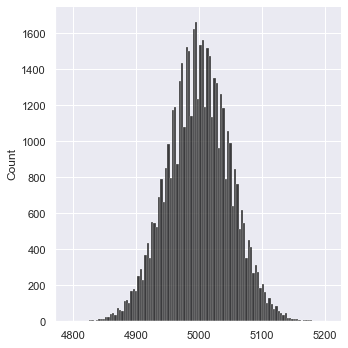

In [172]:
# 샘플사이즈와 시행횟수
n_size = 10000
n_trial = 50000
# 앞면이면 1, 뒷면이면 0으로 표시
coin = np.array([0,1])
# 앞면이 나온 횟수
count_coin = np.zeros(n_trial)
# 동전을 n_size번 던지는 시행을 n_trial번 수행
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = np.sum(
    np.random.choice(coin, size = n_size, replace = True)
    )
# 히스토그램 그리기
sns.distplot(count_coin, color = 'black')

- 표본평균을 계산할 때는 합계를 구하는 계산이 들어가므로 표본 평균은 정규분포에 가까운 분포가 된다고 가정 가능
- 모집단 분포가 이항분포라면 샘플사이즈가 무한히 크다고 해도 모집단이 이항분포인건 변하지 않음